In [10]:
import json

In [11]:
import nltk
from nltk.corpus import stopwords
staph = stopwords.words('english')
staph.append("like")
staph.append("got")
staph.append("get")
staph.append("know")
staph.append("aint")
staph.append("dont")
staph.append("go")

In [12]:
path = "/Users/matthewhwang/Galvanize/Capstone1/Data/Discographies/_Mastered_Cleaned/Snoop Dogg_Master_Discography_Cleaned.txt"

In [13]:
with open(path, 'r') as f:
    contents = json.load(f)["Discography"]
    all_words = []
    for each in contents:
        for words in each["lyrics"].split():
            all_words.append(words.lower())
    

In [14]:
len(all_words)

232709

In [15]:
reduced = [word for word in all_words if word not in staph]

In [16]:
len(reduced)

120491

In [18]:
import pandas as pd
df = pd.DataFrame(reduced)
df.columns = ["Word"]
df['Count'] = 1
g = df.groupby("Word")
new = g.count().sort_values("Count",ascending=False)

In [192]:
new.to_csv(r'/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Snoop Dogg_TopWords.csv')

In [19]:
hello = pd.DataFrame(contents)

In [20]:
hello["words per track"] = hello["lyrics"].apply(lambda x: len(x.split()))

In [21]:
hello["avg length of word"] = hello["lyrics"].apply(lambda x: len(x.strip())) / hello["words per track"] 

In [28]:
hello["im"] = hello["lyrics"].apply(lambda x: x.count("im"))

In [30]:
hello["im_ratio"] = hello['im'] / hello['words per track']

In [41]:
hello["im_ratio"].mean()

0.007087598490298124

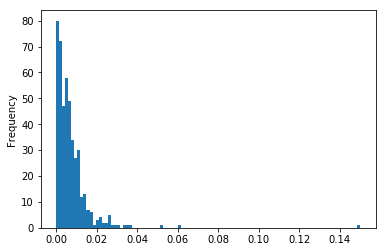

In [165]:
hello['im_ratio'].plot.hist(bins=100)

In [59]:
badwords = pd.read_csv("/Users/matthewhwang/Downloads/Badwords.csv")
badword_list = badwords["4r5e"].to_list()

In [ ]:
hello["count_bad_words"] = hello["lyrics"].apply(lambda x: )

In [25]:
hello.to_csv(r'/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Snoop Dogg_DF.csv')

# CONGREGATION

In [147]:
import pandas as pd
import glob
path = "/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Top Words Overall/*.csv"
df = pd.read_csv("/Users/matthewhwang/Galvanize/Capstone1/Data/Processed/Top Words Overall/Snoop Dogg_TopWords.csv")

# for i,each in enumerate(glob.glob(path)):
#     df = pd.read_csv(each)
#     name = df.iloc[0][0].split(':')[0]
#     if i != 0:
#         df_master[name] = df
#     else:
#         df_master = df
df.head()

,Word,Count
0,im,2566
1,nigga,1425
2,yeah,1094
3,shit,921
4,one,849


In [150]:
curses = df[df["Word"].isin(badword_list)].sum().values[1]
total = df.sum().values
im = df[df["Word"]=="im"].sum().values[1]

In [151]:
print("im rate: {}".format(im/total))
print("swear rate: {}".format(curses/total))
print(im)
print(curses)
print(total)

im rate: [0.0212962]
swear rate: [0.0557469]
2566
6717
[120491]


In [152]:
df.head()

,Word,Count
0,im,2566
1,nigga,1425
2,yeah,1094
3,shit,921
4,one,849


UsageError: Line magic function `%` not found.
